In [1]:
import pandas as pd
from sklearn import metrics as mt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/machine-learning/train.csv')

In [3]:
df_test = pd.read_csv('/content/drive/MyDrive/machine-learning/test.csv')

## Conhecendo o dataset

In [4]:
df_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Descricao de alguns atributos
**Survived** - sobrevivencia <br>
> 0 = Não, 1 = Sim <br>

**Pclass** - classe do bilhete <br>
> 1 = 1º, 2 = 2º, 3 = 3º <br>

**Embarked** - Porto de embarcação<br>
> C = Cherbourg, Q = Queenstown, S = Southampton<br>

**SibSp** - Nº de irmãos/cônjuges a bordo do Titanic <br>
**Parch** - Nº de pais/filhos a bordo do Titanic<br>
**Ticket** - Número do bilhete<br>
**Fare** - Tarifa do passageiro<br>
**Cabin** - Número da cabine<br>

## Analise exploratoria

In [6]:
df_train.shape

(891, 12)

In [7]:
df_test.shape

(418, 11)

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df_train.select_dtypes(include='number').columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

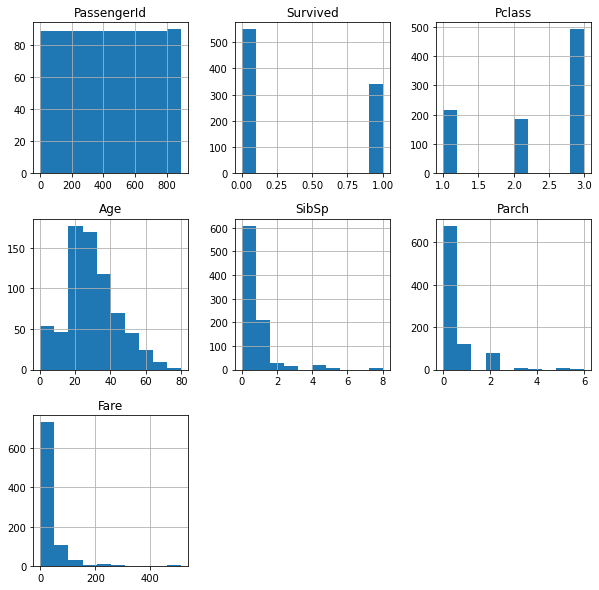

In [12]:
df_train.hist(figsize=(10,10));

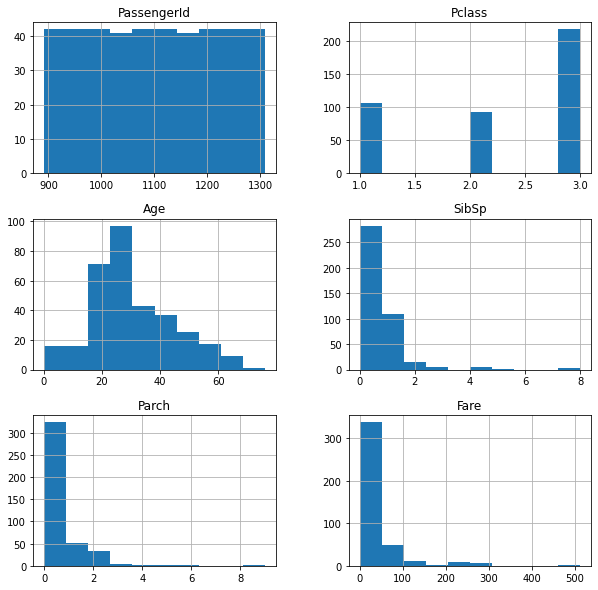

In [13]:
df_test.hist(figsize=(10,10));

In [14]:
matriz_corr = df_train.corr(method='pearson')
matriz_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


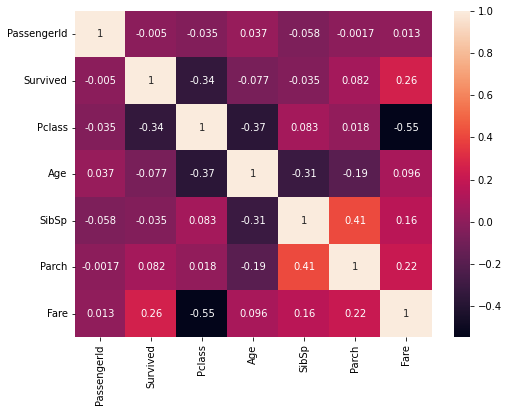

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True)
plt.show()

## Tratando os dados

In [16]:
df_train.loc[df_train['Sex'] == 'male', 'Sex'] = 1
df_train.loc[df_train['Sex'] == 'female', 'Sex'] = 0
df_test.loc[df_test['Sex'] == 'male', 'Sex'] = 1
df_test.loc[df_test['Sex'] == 'female', 'Sex'] = 0

In [17]:
df_train['Sex'] = df_train['Sex'].astype(int)
df_test['Sex'] = df_test['Sex'].astype(int)

In [18]:
df_train.select_dtypes(include='number').columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

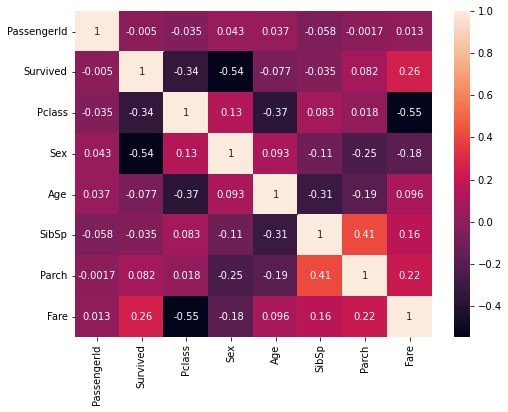

In [19]:
matriz_corr = df_train.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True)
plt.show()

In [20]:
numericos = df_train.select_dtypes(include='number').columns 
df_train[numericos].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [21]:
df_train['Age'].fillna(value=df_train['Age'].median(),inplace=True)

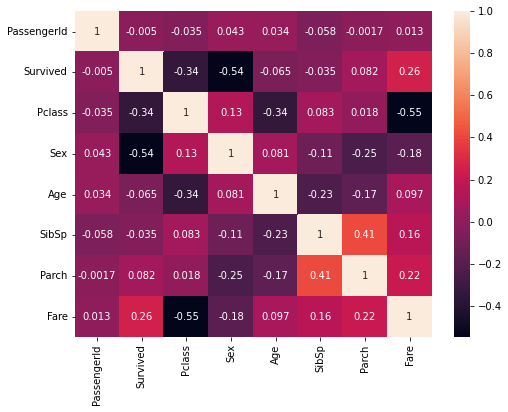

In [22]:
matriz_corr = df_train.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True)
plt.show()

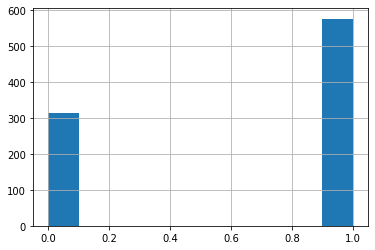

In [23]:
df_train['Sex'].hist();

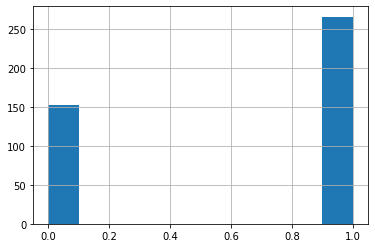

In [24]:
df_test['Sex'].hist();

In [25]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
#colunas selecionadas
columns_x = ['Pclass', 'Sex', 'Age', 'Fare']
columns_y = ['Survived']

In [27]:
df_test[columns_x].isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [28]:
df_test['Age'].fillna(value=df_test['Age'].median(),inplace=True)
df_test['Fare'].fillna(value=df_test['Fare'].median(),inplace=True)

## Separando treino e teste

In [29]:
df = pd.read_csv('/content/drive/MyDrive/machine-learning/gender_submission.csv')

In [30]:
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [31]:
X_train, Y_train = df_train[columns_x], df_train[columns_y]
X_test, Y_test = df_test[columns_x], df['Survived'].values

In [32]:
Y_train = np.asarray(Y_train)
type(Y_train)

numpy.ndarray

In [33]:
Y_train = Y_train.reshape(891,)

## Modelo com as colunas selecionadas

In [34]:
model = linear_model.LogisticRegression()

In [35]:
model.fit(X_train, Y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
mt.accuracy_score(Y_test, y_pred)

0.9425837320574163

## Modelo com todas as colunas numericas

In [38]:
numericos = numericos[2:]
numericos

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [39]:
X_train, X_test = df_train[numericos], df_test[numericos]

In [40]:
X_train.shape, X_test.shape

((891, 6), (418, 6))

In [41]:
model2 = linear_model.LogisticRegression()

In [42]:
model2.fit(X_train, Y_train)

LogisticRegression()

In [43]:
y_pred = model2.predict(X_test)

In [44]:
mt.accuracy_score(Y_test, y_pred)

0.9354066985645934

In [45]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
df_train.shape

(891, 12)

In [54]:
len(df_train.query('Sex==0'))

314

In [67]:
len(df_train.query('Sex==0 & Pclass==1'))

94

In [68]:
len(df_train.query('Sex==0 & Pclass==1 & Survived==1'))

91

In [50]:
len(df_train.query('Sex==0 & Survived==1'))

233

In [55]:
len(df_train.query('Age<18'))

113

In [53]:
len(df_train.query('Age<18 & Survived==1'))

61

In [59]:
len(df_train.query('Pclass==1 & Survived==1'))

136

In [60]:
len(df_train.query('Pclass==2 & Survived==1'))

87

In [61]:
len(df_train.query('Pclass==3 & Survived==1'))

119

In [65]:
len(df_train.query('Age<18 & Pclass!=3 & Survived==1'))

32

In [63]:
len(df_train.query('Age<18 & Pclass==1 & Survived==1'))

11

In [64]:
len(df_train.query('Age<18 & Pclass==1'))

12

In [66]:
len(df_train.query('Age<18 & Pclass!=1'))

101